In [1]:
## Inputs:
import pandas as pd
sample_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/"
df_h = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t") 
df_nh = pd.read_csv( sample_path + "neighborhood_ifwaste_sample_df.txt", sep="\t") 
df_sim = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t") 

### Input distributions across all household of 1 simulation

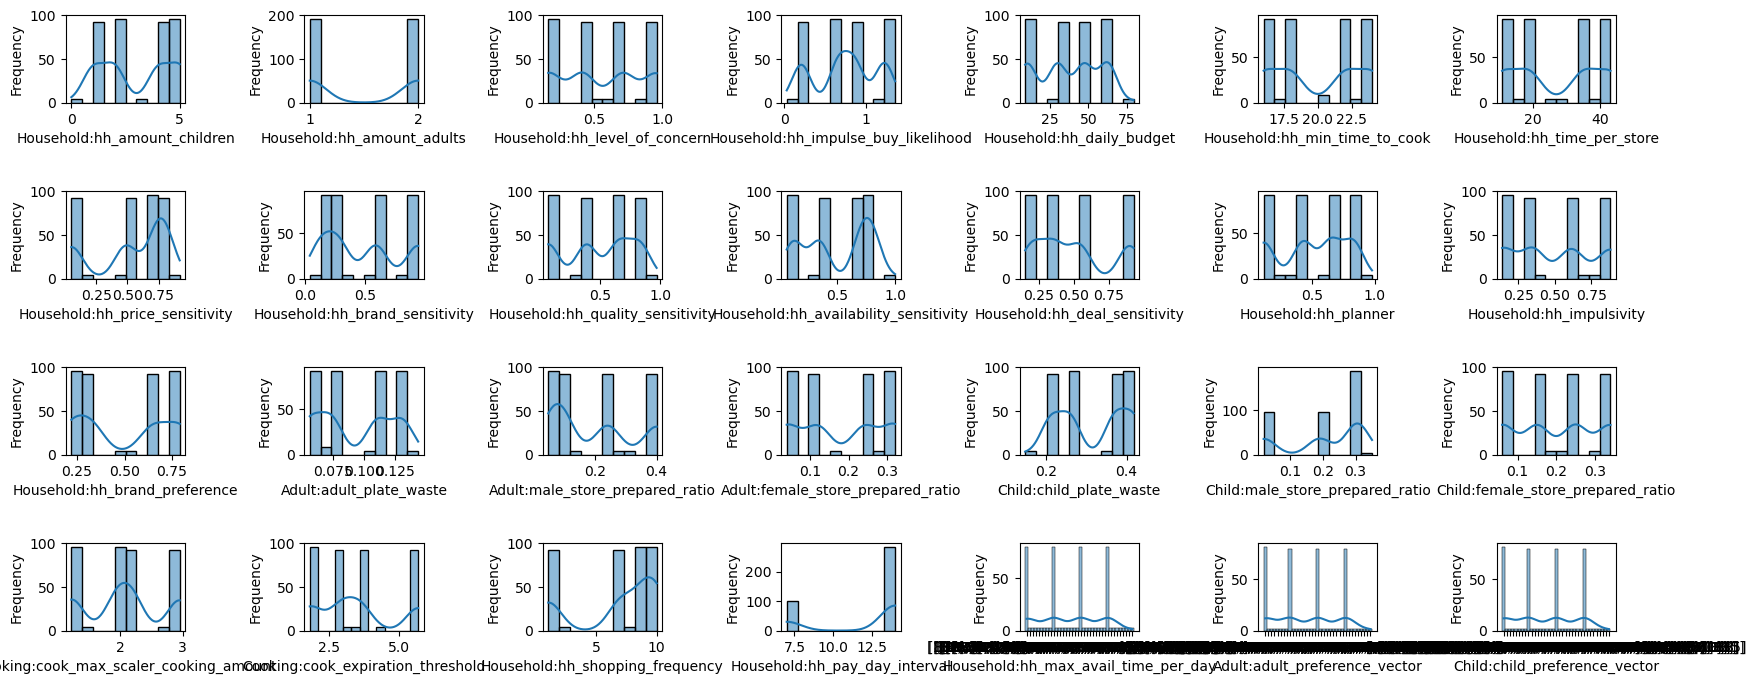

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4,7, figsize=(20,8))
for i in range(4):
    for j in range(7):
        column = df_h.columns[i*7+j]
        sns.histplot(df_h[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [4]:

#for gauss -> z score
#for log norm -> log transform (to gauss)
#else -> quantile bucketing (https://developers.google.com/machine-learning/crash-course/numerical-data/binning#quantile_bucketing)

##categorical data:
# single -> transform to number
# multi -> Jaccard similarity ratio of common values to total values

In [5]:
sample_path = "/blue/carpena/haasehelen/ifwaste/output/gsua_test/old/run_0/"
filename = "aggregated_outputs.csv"

outputs = pd.read_csv( sample_path + filename) 
outputs.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop
0,16.0,322.924,329.782,236.360,241.360,264.596,311.161,678.690,266.480,1418.286,700.109,1226.060,480.124,678.690,100.0,0.0,72.0,0.0,0.0
1,87.0,325.633,267.722,287.228,160.322,182.538,161.036,629.961,278.652,866.654,869.133,764.065,620.413,629.961,100.0,0.0,41.0,0.0,0.0
2,38.0,485.570,259.784,267.169,151.273,203.451,249.312,576.218,305.950,1013.953,872.873,865.206,751.353,576.218,100.0,0.0,12.0,0.0,0.0
3,95.0,55.360,92.975,124.799,86.657,72.888,84.795,163.555,120.277,405.667,155.086,381.816,135.659,163.555,100.0,0.0,78.0,0.0,0.0
4,69.0,463.584,223.128,180.836,110.905,189.930,163.654,631.376,252.469,832.016,878.928,699.578,632.459,631.376,100.0,0.0,44.0,0.0,0.0


In [6]:
print(len(outputs.columns))

19


### Output distributions across all household of 1 simulation

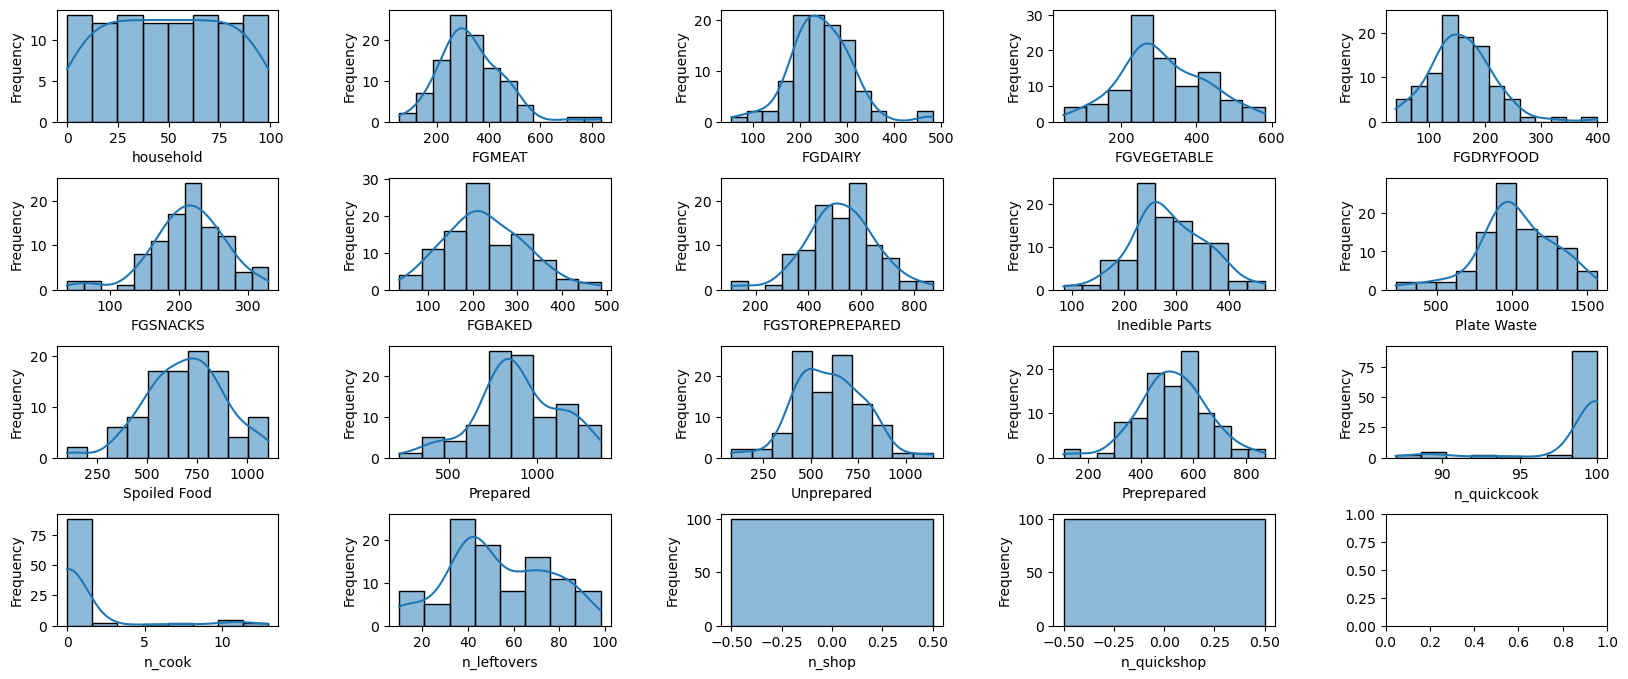

In [7]:

fig, axs = plt.subplots(4,5, figsize=(20,8))

for i in range(4):
    for j in range(5):
        if i*5+j >= 19:
            break
        column = outputs.columns[i*5+j]
        sns.histplot(outputs[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

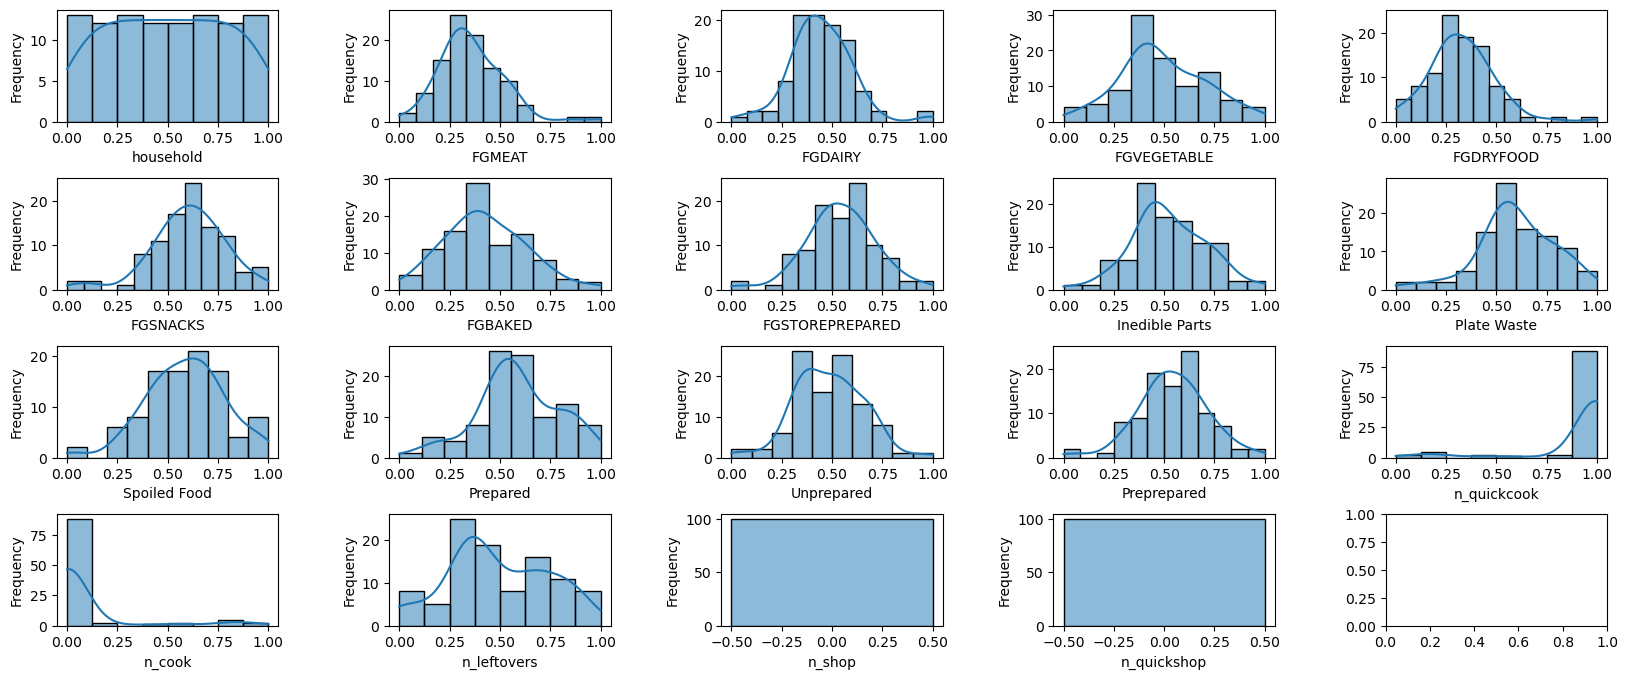

In [8]:
## Normalize data
import pandas as pd
from sklearn import preprocessing

x = outputs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
outputs_normalized = pd.DataFrame(x_scaled,columns=outputs.columns)

fig, axs = plt.subplots(4,5, figsize=(20,8))

for i in range(4):
    for j in range(5):
        if i*5+j >= 19:
            break
        column = outputs_normalized.columns[i*5+j]
        sns.histplot(outputs_normalized[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [9]:
## TODO -> fix n_shop + n_quickshop
# figure out which algorithm fits best: https://scikit-learn.org/stable/modules/clustering.html
# how much scattering between exact reruns?
# ignore ramp up phase?
# stochastic part from gsua as similarity?

#for now drop columns
outputs = outputs.drop(columns=["n_shop", "n_quickshop", "household"])
outputs_normalized = outputs_normalized.drop(columns=["n_shop", "n_quickshop", "household"])

In [10]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for clustering
from sklearn.cluster import KMeans

In [11]:
# set number of clusters
k = 4

# cluster the images
kmeans_model = KMeans(n_clusters=k).fit(outputs)


In [12]:
labels_df = pd.DataFrame(data=np.transpose(kmeans_model.labels_), index=outputs_normalized.index, columns=['cluster'])

# list countries in each cluster:
for i in range(k):
    print(f'HH in Cluster {i}:')
    print(labels_df.index[labels_df['cluster']==i].tolist())
    print(len(labels_df.index[labels_df['cluster']==i].tolist()))

HH in Cluster 0:
[17, 19, 21, 26, 31, 38, 40, 46, 50, 60, 66, 89, 93, 95]
14
HH in Cluster 1:
[1, 4, 6, 9, 10, 13, 23, 24, 25, 27, 29, 30, 32, 33, 34, 36, 39, 41, 43, 49, 51, 52, 54, 57, 58, 59, 61, 63, 64, 67, 69, 70, 71, 73, 75, 78, 79, 88, 90, 92, 96, 98, 99]
43
HH in Cluster 2:
[3, 7, 16, 20, 22, 44, 47, 55, 76, 80, 91]
11
HH in Cluster 3:
[0, 2, 5, 8, 11, 12, 14, 15, 18, 28, 35, 37, 42, 45, 48, 53, 56, 62, 65, 68, 72, 74, 77, 81, 82, 83, 84, 85, 86, 87, 94, 97]
32


In [13]:
# Get centroids of each cluster.
for i in range(k):
    print(f'\nCluster {i}:')
    # display non-normalized mean values
    mean_to_display = outputs[labels_df['cluster']==i].mean()
    display(mean_to_display)


Cluster 0:


FGMEAT              513.304857
FGDAIRY             284.764857
FGVEGETABLE         451.622286
FGDRYFOOD           224.078214
FGSNACKS            236.931143
FGBAKED             354.285929
FGSTOREPREPARED     657.645214
Inedible Parts      390.872429
Plate Waste        1365.252000
Spoiled Food        966.507929
Prepared           1207.491643
Unprepared          857.495143
Preprepared         657.645214
n_quickcook          97.500000
n_cook                2.500000
n_leftovers          70.642857
dtype: float64


Cluster 1:


FGMEAT             301.733419
FGDAIRY            240.256442
FGVEGETABLE        259.712419
FGDRYFOOD          137.172116
FGSNACKS           209.045791
FGBAKED            185.058256
FGSTOREPREPARED    496.334628
Inedible Parts     257.956744
Plate Waste        936.013233
Spoiled Food       635.343023
Prepared           802.027442
Unprepared         530.951047
Preprepared        496.334628
n_quickcook         99.813953
n_cook               0.186047
n_leftovers         38.604651
dtype: float64


Cluster 2:


FGMEAT             166.020000
FGDAIRY            144.503000
FGVEGETABLE        159.669909
FGDRYFOOD           71.151455
FGSNACKS           118.275636
FGBAKED            119.950727
FGSTOREPREPARED    308.464273
Inedible Parts     171.093091
Plate Waste        546.522000
Spoiled Food       370.419727
Prepared           457.343636
Unprepared         322.226909
Preprepared        308.464273
n_quickcook         99.000000
n_cook               1.000000
n_leftovers         71.909091
dtype: float64


Cluster 3:


FGMEAT              347.740000
FGDAIRY             266.662063
FGVEGETABLE         367.939500
FGDRYFOOD           189.175594
FGSNACKS            240.512031
FGBAKED             267.468031
FGSTOREPREPARED     571.150938
Inedible Parts      317.582719
Plate Waste        1168.937688
Spoiled Food        764.127563
Prepared           1016.868531
Unprepared          662.628594
Preprepared         571.150938
n_quickcook          98.218750
n_cook                1.781250
n_leftovers          58.093750
dtype: float64

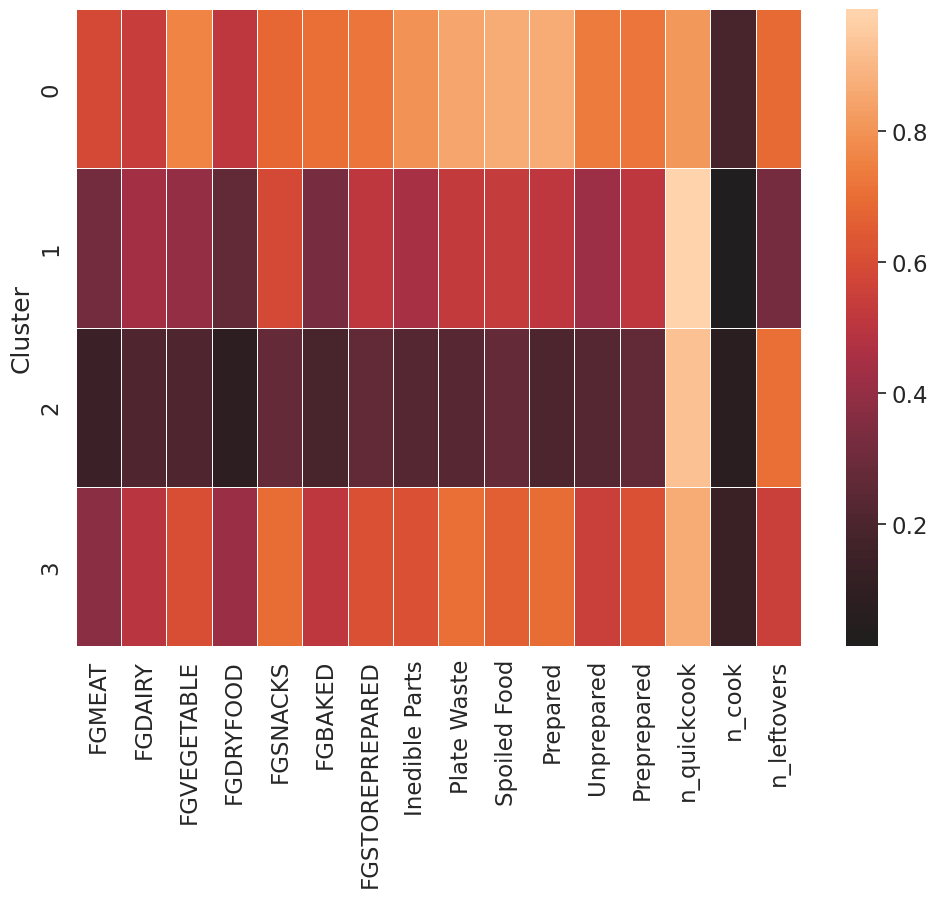

In [14]:
# get normalized values
normalized_means = []
for i in range(k):
    # calculate normalized values for the next part
    mean_normalized = outputs_normalized[labels_df['cluster']==i].mean()
    normalized_means.append(mean_normalized.to_frame().transpose())
normalized_means_df = pd.concat(normalized_means)

# For better visualization, we'll multiply the following features by -1
# so that a higher value is associated with more development.

# Plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
ax = sns.heatmap(normalized_means_df.to_numpy(), linewidth=0.5, xticklabels=normalized_means_df.columns, center=0)
ax.set_ylabel("Cluster")


plt.show()

In [15]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#import shap
#import umap
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Input, Dense

In [16]:
outputs_normalized.head()

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
0,0.344547,0.644007,0.354617,0.559061,0.777971,0.612033,0.748623,0.473820,0.888760,0.596515,0.883048,0.375655,0.748623,1.0,0.0,0.704545
1,0.348036,0.498488,0.449649,0.332812,0.495370,0.278136,0.684711,0.505449,0.476956,0.764158,0.477187,0.507952,0.684711,1.0,0.0,0.352273
2,0.553990,0.479874,0.412174,0.307548,0.567392,0.474473,0.614223,0.576383,0.586917,0.767867,0.566039,0.631432,0.614223,1.0,0.0,0.022727
3,0.000000,0.088737,0.146197,0.127148,0.117744,0.108566,0.072983,0.093912,0.132820,0.055947,0.141383,0.050814,0.072983,1.0,0.0,0.772727
4,0.525678,0.393923,0.250886,0.194846,0.520827,0.283958,0.686567,0.437413,0.451098,0.773873,0.420536,0.519311,0.686567,1.0,0.0,0.386364


In [17]:
cluster_algorithms = {
    "KMeans": KMeans(n_clusters=4, random_state=0),
    "GMM": GaussianMixture(n_components=4, random_state=0),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=4)
}


results = {}

for name, algo in cluster_algorithms.items():
    if hasattr(algo, 'fit_predict'):
        labels = algo.fit_predict(outputs_normalized)
    else:
        algo.fit(outputs_normalized)
        labels = algo.predict(outputs_normalized)

    results[name] = {
        'labels': labels,
        'silhouette': silhouette_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0 , #higher is better -> distance to other point in its cluster vs distance to neighb. cluster
        'calinski': calinski_harabasz_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0, #high is better -> cluster dispersion to own cluter vs other cluster 
        'davies': davies_bouldin_score(outputs_normalized, labels) if len(set(labels)) > 1 else 100 #low is better -> determines optimal number of clusters in a dataset
    }

In [18]:
def rank_algorithms(result_dict):
    sil_max = max(v['silhouette'] for v in result_dict.values())
    cal_max = max(v['calinski'] for v in result_dict.values())
    dav_min = min(v['davies'] for v in result_dict.values())

    scores = {}
    for name, v in result_dict.items():
        score = 0
        if v['silhouette'] == sil_max:
            print(name, " silhouette: ", v["silhouette"])
            score += 1
        if v['calinski'] == cal_max:
            print(name," calinski: ", v["calinski"])
            score += 1
        if v['davies'] == dav_min:
            print(name," davies: ", v["davies"])
            score += 1
        scores[name] = score
    return scores

ranked_scores = rank_algorithms(results)
best_algo_name = max(ranked_scores, key=ranked_scores.get)
labels_final = results[best_algo_name]['labels']
print(ranked_scores)
print( "--->", best_algo_name)

Agglomerative  silhouette:  0.32743064112607
Agglomerative  calinski:  46.20822621319498
Agglomerative  davies:  1.053935354087161
{'KMeans': 0, 'GMM': 0, 'DBSCAN': 0, 'Agglomerative': 3}
---> Agglomerative


In [19]:
outputs_normalized.values

array([[0.34454722, 0.64400711, 0.35461663, ..., 1.        , 0.        ,
        0.70454545],
       [0.34803565, 0.49848759, 0.44964887, ..., 1.        , 0.        ,
        0.35227273],
       [0.55398955, 0.47987441, 0.41217439, ..., 1.        , 0.        ,
        0.02272727],
       ...,
       [0.25502371, 0.36566996, 0.57732065, ..., 1.        , 0.        ,
        0.86363636],
       [0.38577096, 0.44329522, 0.49092703, ..., 0.92307692, 0.07692308,
        0.34090909],
       [0.40185329, 0.40895299, 0.31378498, ..., 1.        , 0.        ,
        0.        ]])

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

outputs_normalized_tensor = torch.from_numpy(outputs_normalized.values)

# Optional: Autoencoder in PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_dim, encoding_dim), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(encoding_dim, input_dim))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = outputs_normalized_tensor.shape[1]
encoding_dim = 5
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_tensor = torch.tensor(outputs_normalized_tensor, dtype=torch.float32)
for epoch in range(100):
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    X_encoded = model.encoder(X_tensor).numpy()
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_encoded)

/tmp/ipykernel_3383062/3749830270.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(outputs_normalized_tensor, dtype=torch.float32)


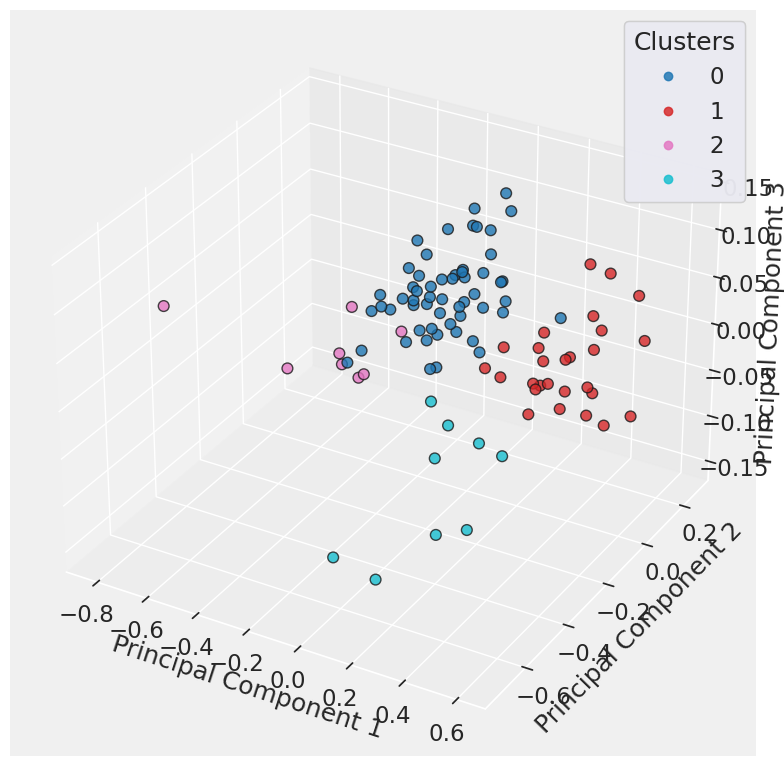

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA transformation
pca = PCA(n_components=3)
X_vis = pca.fit_transform(X_encoded)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Background and grid
ax.set_facecolor('#f0f0f0')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Scatter plot
scatter = ax.scatter(
    X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
    c=labels_final, cmap='tab10', s=60, edgecolors='k', alpha=0.8
)

# Axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


In [22]:
### consider n  and algorithm:


# 3. Optimize number of clusters per algorithm and store best labels
from sklearn.cluster import Birch, SpectralClustering


cluster_algorithms = {
    "KMeans": lambda n: KMeans(n_clusters=n, random_state=0),
    "GMM": lambda n: GaussianMixture(n_components=n, random_state=0),
    "Agglomerative": lambda n: AgglomerativeClustering(n_clusters=n),
    "Spectral": lambda n: SpectralClustering(n_clusters=n, random_state=0, affinity='nearest_neighbors'),
    "Birch": lambda n: Birch(n_clusters=n)
}

n_clusters_range = range(2, 10)
results = {}

for name, constructor in cluster_algorithms.items():
    sils, cals, davs = [], [], []
    
    ##### -------------- best n per algorithm
    for n in n_clusters_range:
        algo = constructor(n)
        if hasattr(algo, 'fit_predict'):
            labels = algo.fit_predict(X_encoded)
        else:
            algo.fit(X_encoded)
            labels = algo.predict(X_encoded)
        sils.append(silhouette_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0)  #higher is better -> distance to other point in its cluster vs distance to neighb. cluster)
        cals.append(calinski_harabasz_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0) #high is better -> cluster dispersion to own cluter vs other cluster )
        davs.append(davies_bouldin_score(outputs_normalized, labels) if len(set(labels)) > 1 else 100) #low is better -> determines optimal number of clusters in a dataset)

    # Find best n by max sil + cal and min dav
    #TODO choose scoring // normalize values!!! 
    sils_arr, cals_arr, davs_arr = np.array(sils), np.array(cals), np.array(davs)
    score =  0.5 * sils_arr / sils_arr.max() + 0.5 * cals_arr / cals_arr.max() - davs_arr / davs_arr.max()
    best_n = n_clusters_range[np.argmax(score)]
    #best_n = n_clusters_range[np.argmin(davs_arr)]
    
    ##### -------------- now choose algorithm
    # Rerun with best_n
    best_algo = constructor(best_n)
    if hasattr(best_algo, 'fit_predict'):
        best_labels = best_algo.fit_predict(X_encoded)
    else:
        best_algo.fit(X_encoded)
        best_labels = best_algo.predict(X_encoded)

    results[name] = {
        'labels': best_labels,
        'silhouette': silhouette_score(X_encoded, best_labels),
        'calinski': calinski_harabasz_score(X_encoded, best_labels),
        'davies': davies_bouldin_score(X_encoded, best_labels),
        'best_n': best_n,
        'silhouettes': sils,
        'calinskis': cals,
        'daviess': davs
    }

/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (2). Decrease the threshold.
  warnings.warn(
/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(
/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packa

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

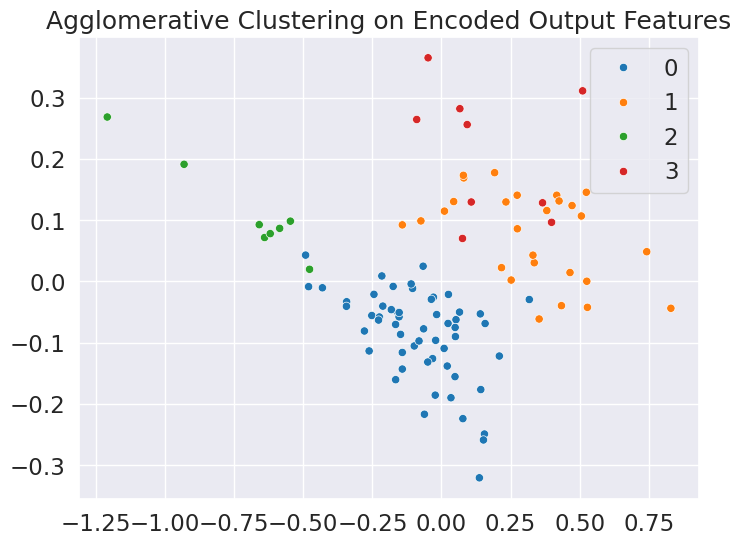

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels_final, palette='tab10')
plt.title(f"{best_algo_name} Clustering on Encoded Output Features")
plt.show()

In [ ]:

# DBSCAN (no n_clusters)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_encoded)
results["DBSCAN"] = {
    'labels': labels,
    'silhouette': silhouette_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0 , #higher is better -> distance to other point in its cluster vs distance to neighb. cluster
    'calinski': calinski_harabasz_score(outputs_normalized, labels) if len(set(labels)) > 1 else 0, #high is better -> cluster dispersion to own cluter vs other cluster 
}

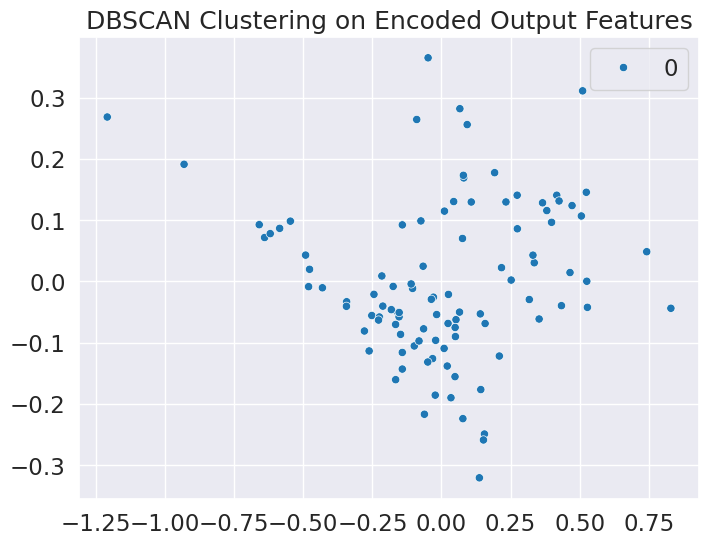

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels, palette='tab10')
plt.title(f"DBSCAN Clustering on Encoded Output Features")
plt.show()

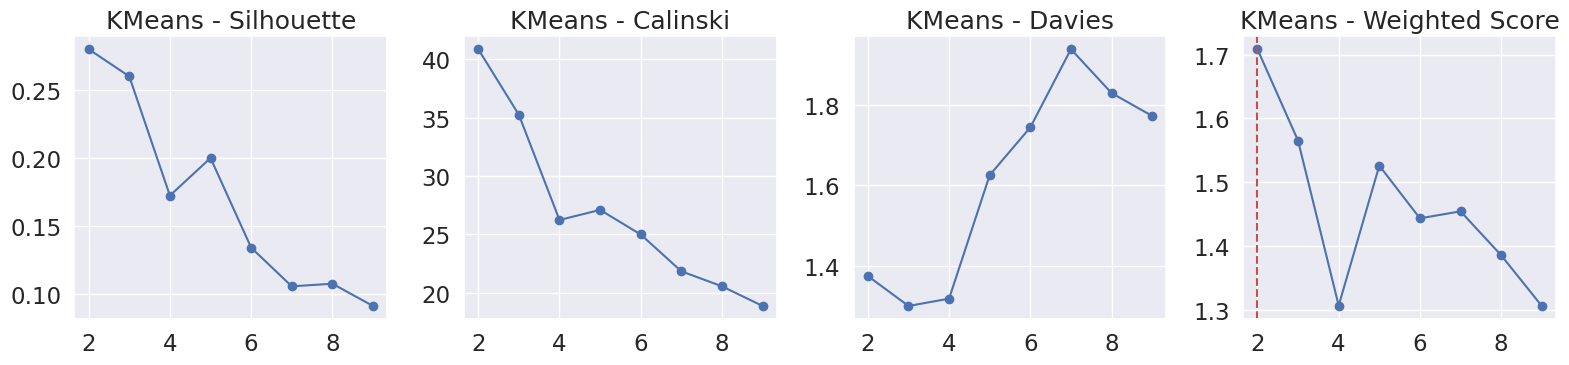

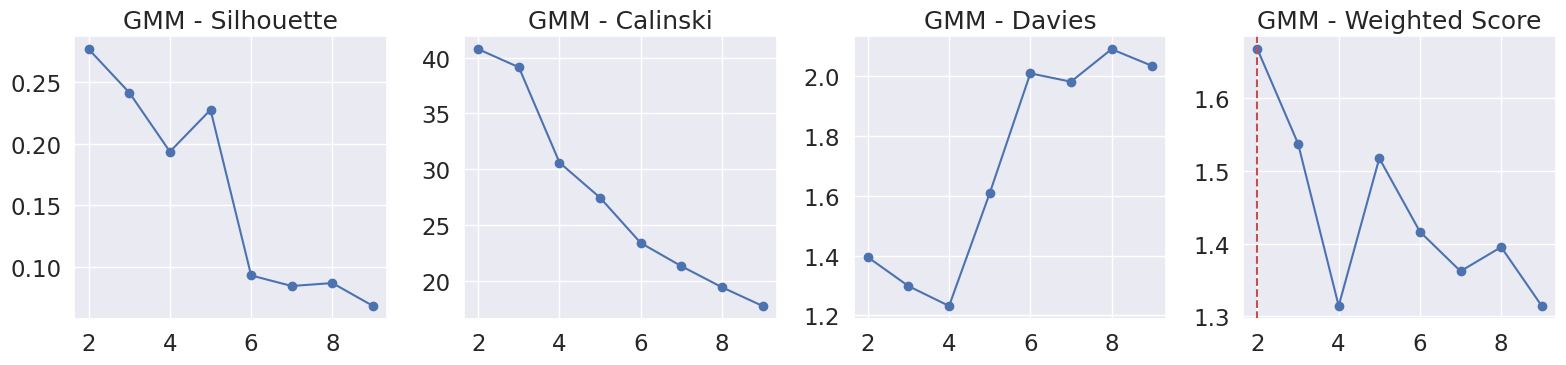

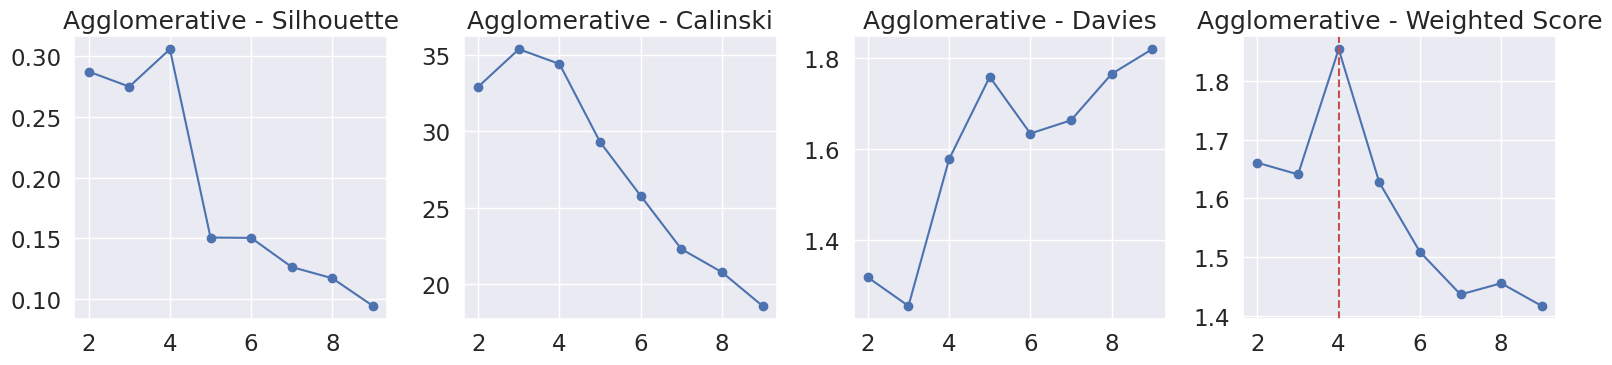

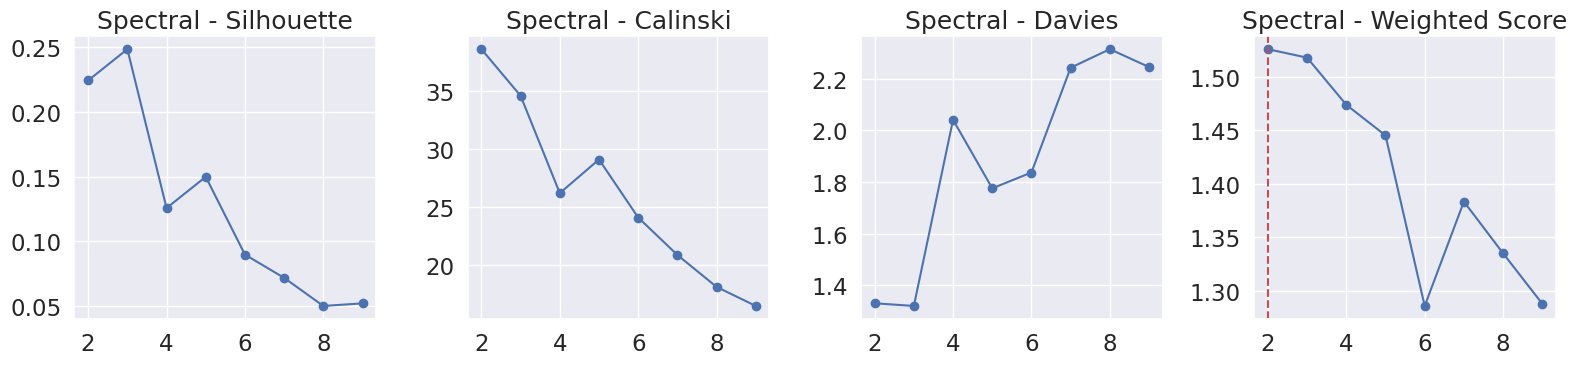

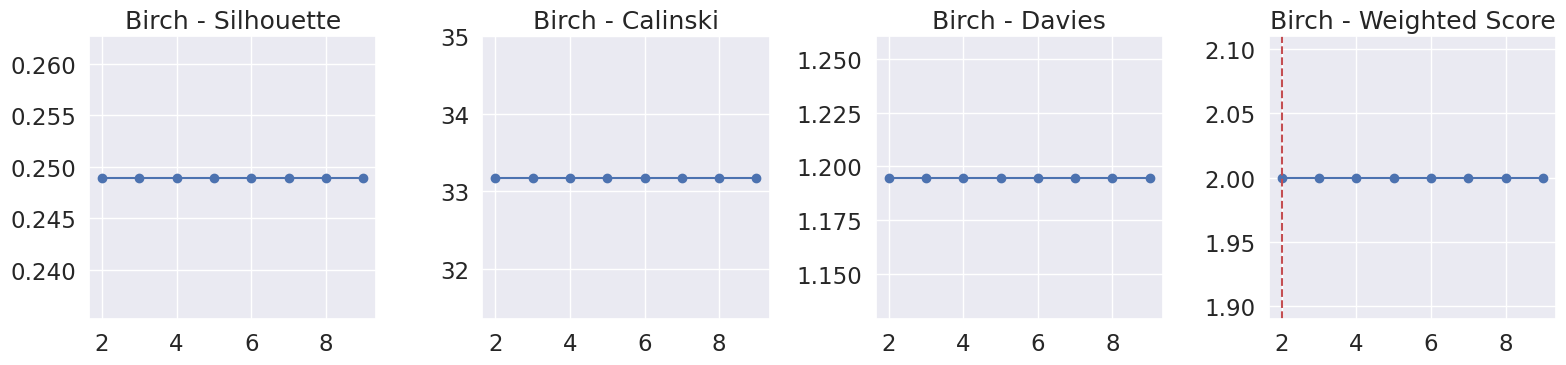

In [ ]:
#Plot optimization curves
for name, res in results.items():
    if 'silhouettes' in res:
        plt.figure(figsize=(16, 4))

        plt.subplot(1, 4, 1)
        plt.plot(n_clusters_range, res['silhouettes'], marker='o')
        plt.title(f"{name} - Silhouette")

        plt.subplot(1, 4, 2)
        plt.plot(n_clusters_range, res['calinskis'], marker='o')
        plt.title(f"{name} - Calinski")

        plt.subplot(1, 4, 3)
        plt.plot(n_clusters_range, res['daviess'], marker='o')
        plt.title(f"{name} - Davies")

        # Weighted score subplot
        weights = {'silhouette': 0.5, 'calinski': 0.5, 'daviess': 1.0}
        sil_norm = np.array(res['silhouettes']) / np.max(res['silhouettes'])
        cal_norm = np.array(res['calinskis']) / np.max(res['calinskis'])
        dav_norm = np.array(res['daviess']) / np.max(res['daviess'])
        combined_score = weights['silhouette'] * sil_norm + weights['calinski'] * cal_norm + weights['daviess'] * dav_norm

        plt.subplot(1, 4, 4)
        plt.plot(n_clusters_range, combined_score, marker='o')
        plt.title(f"{name} - Weighted Score")
        best_index = np.argmax(combined_score)
        best_cluster_n = n_clusters_range[best_index]
        plt.axvline(x=best_cluster_n, color='r', linestyle='--')

        plt.tight_layout()
        plt.show()

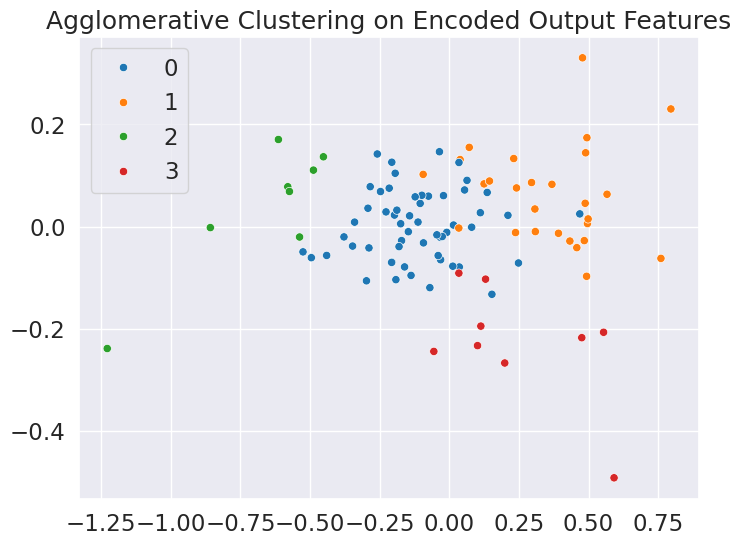

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels_final, palette='tab10')
plt.title(f"{best_algo_name} Clustering on Encoded Output Features")
plt.show()

In [ ]:
labels_final

array([1, 0, 0, 2, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 2, 1, 3, 3, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       0, 3, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
mean_normalized

FGMEAT             0.505291
FGDAIRY            0.502042
FGVEGETABLE        0.688498
FGDRYFOOD          0.599038
FGSNACKS           0.757099
FGBAKED            0.501493
FGSTOREPREPARED    0.621717
Inedible Parts     0.759727
Plate Waste        0.850982
Spoiled Food       0.641521
Prepared           0.868674
Unprepared         0.581161
Preprepared        0.621717
n_quickcook        0.256410
n_cook             0.743590
n_leftovers        0.613636
best_label         3.000000
dtype: float64

In [ ]:
normalized_means_df

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
0,0.332093,0.425460,0.426801,0.277507,0.576664,0.364433,0.525915,0.471315,0.534852,0.567134,0.515298,0.454634,0.525915,0.983516,0.016484,0.304992
0,0.421749,0.533466,0.660568,0.422251,0.708402,0.620308,0.641365,0.655878,0.764692,0.720936,0.768606,0.603268,0.641365,0.994302,0.005698,0.728535
0,0.122695,0.204193,0.165662,0.062606,0.225708,0.128519,0.246629,0.192232,0.183513,0.253113,0.165263,0.187514,0.246629,0.903846,0.096154,0.822443
0,0.505291,0.502042,0.688498,0.599038,0.757099,0.501493,0.621717,0.759727,0.850982,0.641521,0.868674,0.581161,0.621717,0.256410,0.743590,0.613636
0,0.332093,0.425460,0.426801,0.277507,0.576664,0.364433,0.525915,0.471315,0.534852,0.567134,0.515298,0.454634,0.525915,0.983516,0.016484,0.304992
0,0.421749,0.533466,0.660568,0.422251,0.708402,0.620308,0.641365,0.655878,0.764692,0.720936,0.768606,0.603268,0.641365,0.994302,0.005698,0.728535
0,0.122695,0.204193,0.165662,0.062606,0.225708,0.128519,0.246629,0.192232,0.183513,0.253113,0.165263,0.187514,0.246629,0.903846,0.096154,0.822443
0,0.505291,0.502042,0.688498,0.599038,0.757099,0.501493,0.621717,0.759727,0.850982,0.641521,0.868674,0.581161,0.621717,0.256410,0.743590,0.613636
0,0.505291,0.502042,0.688498,0.599038,0.757099,0.501493,0.621717,0.759727,0.850982,0.641521,0.868674,0.581161,0.621717,0.256410,0.743590,0.613636
0,0.505291,0.502042,0.688498,0.599038,0.757099,0.501493,0.621717,0.759727,0.850982,0.641521,0.868674,0.581161,0.621717,0.256410,0.743590,0.613636


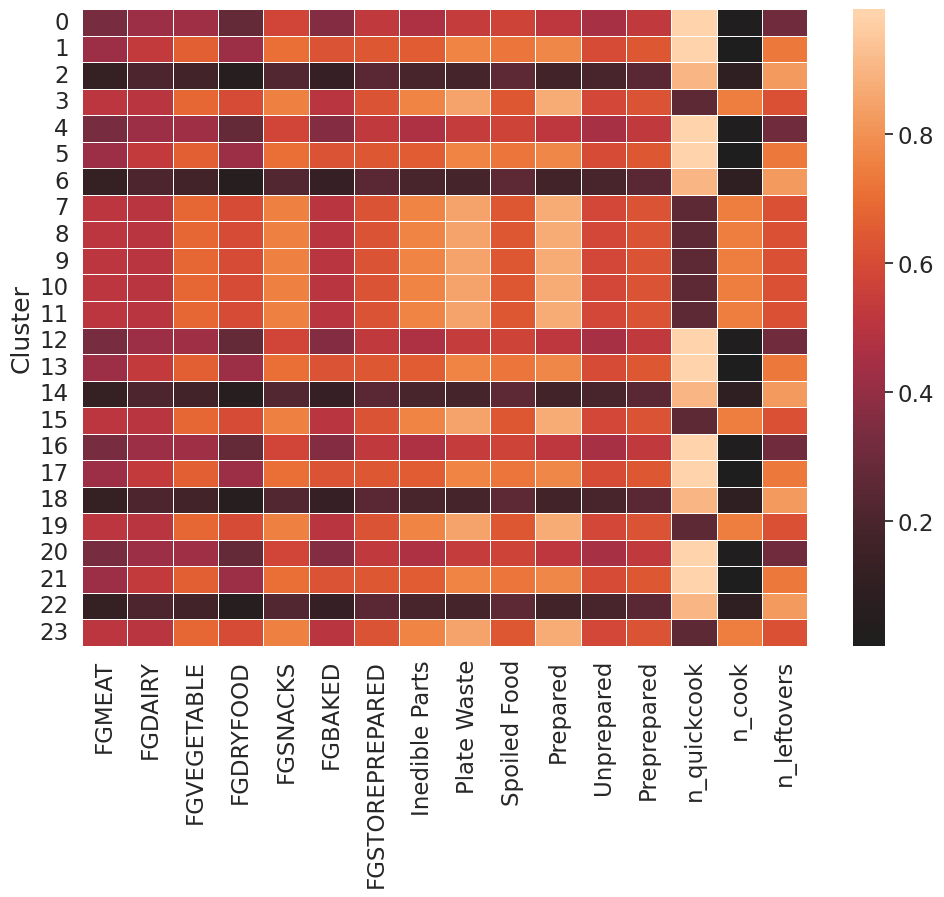

In [ ]:
# get normalized values
k = 4
outputs_normalized["best_label"] = labels_final
for i in range(k):
    # calculate normalized values for the next part
    mean_normalized = outputs_normalized[outputs_normalized['best_label']==i].mean()
    normalized_means.append(mean_normalized.to_frame().transpose())
    normalized_means_df = pd.concat(normalized_means)
    normalized_means_df =  normalized_means_df.drop(columns=["best_label"])


# Plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
ax = sns.heatmap(normalized_means_df.to_numpy(), linewidth=0.5, xticklabels=normalized_means_df.columns, center=0)
ax.set_ylabel("Cluster")


plt.show()